In [45]:
import pandas as pd

df_data = pd.read_excel('C:/Users/09368/workspace/data/excel/Article_economy_202101_202104.xlsx')

print(len(df_data))

title  = df_data['title'].values.tolist()
body   = df_data['body'].values.tolist()
date   = df_data['date'].values.tolist()
source = df_data['source'].values.tolist()

18472


### LDA Topic Modeling
##### 다양한 키워드를 기반으로 내용을 유형화(그룹화)시켜, 단어나 문서의 숨겨진 주제(TOPIC)을 찾아냄

##### 명사 추출 (konlpy)

In [29]:
from konlpy.tag import Kkma
import re

kkma = Kkma()

dataset = []

for i in range(len(test_title)):
    dataset.append(kkma.nouns(re.sub('[^가-힣a-zA-Z\s]','',test_title[i])))
    

##### gensim을 통해 Corpus(말뭉치) Dictionary(사전) 언어모델 형성

In [30]:
from gensim import corpora, models # LDA 적용을 위한 텍스트의 벡터화
import gensim

"""
단어의 비중이 너무 큰 단어들 혹은 의미 없는 단어들에 대해 덜어내고 하위 키워드들을 꺼낼 때 사용 (선 토픽모델링 시각화 후 다시 전처리)
"""
high_score_reviews = dataset

high_score_reviews = [[y for y in x if not len(y) == 1]
                      for x in high_score_reviews]

# 데이터를 dictionary형태로 명사 리스트 만들기
dictionary = corpora.Dictionary(high_score_reviews)

# vector 로 변환한 bag of words(corpus) 결과물
corpus = [dictionary.doc2bow(text) for text in high_score_reviews]

print(corpus[:5])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)], [(4, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)], [(18, 1), (19, 1), (20, 1), (21, 1)], [(22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1)], [(29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1)]]


##### CoherenceModel 을 통한 모델 평가 및 토픽 최적화

In [31]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

"""
CoherenceModel 을 통한 토픽 최적화

토픽이 얼마나 의미론적으로 일관성 있는지 판단. 높을수록 의미론적 일관성 높음

주 용도: 해당 모델이 얼마나 실제로 의미 있는 결과를 내는지 확인
"""

coherence_values = []
for i in range(2, 15):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=high_score_reviews, dictionary=dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)
    

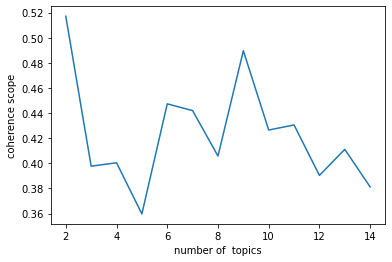

In [32]:
x = range(2, 15)

plt.plot(x, coherence_values)
plt.xlabel("number of  topics")
plt.ylabel("coherence scope")
plt.show()

#####  LDA 시각화

In [33]:
ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=10, alpha=0.1, id2word=dictionary)

ldamodel.print_topics(num_words=20)

[(0,
  '0.024*"신년" + 0.016*"기획" + 0.016*"전년" + 0.016*"신년기획" + 0.009*"기업" + 0.009*"코로나" + 0.009*"대비" + 0.009*"경기" + 0.009*"수업" + 0.009*"시대" + 0.009*"창설테러국지도" + 0.009*"교육" + 0.009*"활기" + 0.009*"여야" + 0.009*"시티" + 0.009*"비전" + 0.009*"신속대응사단" + 0.009*"가속" + 0.009*"투입" + 0.009*"선물세트"'),
 (1,
  '0.026*"인도" + 0.021*"현대" + 0.018*"코로나" + 0.018*"현대차" + 0.018*"최다" + 0.018*"판매" + 0.009*"올해" + 0.009*"가스" + 0.009*"강타" + 0.009*"심사" + 0.009*"사용" + 0.009*"비축미" + 0.009*"대비" + 0.009*"회장" + 0.009*"인은" + 0.009*"등급" + 0.009*"벼등급" + 0.009*"분기" + 0.009*"농협중앙회" + 0.009*"농협"'),
 (2,
  '0.022*"코로나" + 0.015*"신년" + 0.015*"일생활" + 0.015*"하위권" + 0.015*"조현준" + 0.015*"인정" + 0.015*"회장" + 0.015*"전국" + 0.015*"특집" + 0.015*"현준" + 0.015*"북도" + 0.015*"균형지수" + 0.015*"전북도민" + 0.015*"효성" + 0.015*"생활" + 0.015*"균형" + 0.015*"지수" + 0.008*"새해" + 0.008*"대면" + 0.008*"지원"'),
 (3,
  '0.020*"수출" + 0.020*"부산" + 0.020*"올해" + 0.010*"경제" + 0.010*"아파트" + 0.010*"업계" + 0.010*"신뢰" + 0.010*"정책" + 0.010*"어촌" + 0.010*"전망" + 0.010*"랜선체험맛" + 0.010*"여행

In [34]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)

vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.109106  0.084606       1        1  12.570344
5      0.154440 -0.053712       2        1  12.515985
9     -0.109227  0.031667       3        1  11.704284
2     -0.047977 -0.105686       4        1  11.208223
0     -0.025659 -0.121598       5        1  11.165352
1      0.032353 -0.013070       6        1   9.422474
4     -0.070653  0.083800       7        1   9.341158
3     -0.015019 -0.016591       8        1   7.519745
7      0.003329  0.112308       9        1   7.336349
8     -0.030694 -0.001725      10        1   7.216086, topic_info=    Term      Freq     Total Category  logprob  loglift
46    올해  6.000000  6.000000  Default  30.0000  30.0000
60    세금  2.000000  2.000000  Default  29.0000  29.0000
160  병원성  5.000000  5.000000  Default  28.0000  28.0000
202   인도  3.000000  3.000000  Default  27.0000  27.0000
14   지난해  4.000000  4.000000  Default  26.0000  26.0000
..   ...       ...       ...      ...      ...      ...
41    지원  0.651426  6.050385  Topic10  -4.4331   0.4001
164   전북  0.651413  1.854009  Topic10  -4.4331   1.5829
101   대비  0.651410  2.466156  Topic10  -4.4331   1.2976
46    올해  0.651407  6.178918  Topic10  -4.4331   0.3791
78    인상  0.651404  1.800041  Topic10  -4.4331   1.6124

[458 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
474       8  0.878665    가격
140       6  0.823651    가구
432       1  0.623525    가금
432       9  0.311762    가금
433       1  0.623531  가금농장
...     ...       ...   ...
43        3  0.521472    횡성
44        3  0.521459   횡성군
57        4  0.425580    효성
57        8  0.425580    효성
404       7  0.876085    휴면

[500 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 10, 3, 1, 2, 5, 4, 8, 9])

##### 토픽에 할당된 키워드 추출 (Topic-Keyword)

In [44]:
"""
각 토픽에 할당된 단어와 단어별 토픽 차지 비율 추출
02. 데이터 프레임화
03. 토픽별 추출
"""

kk = ldamodel.show_topic(9, topn=8000)
type(ldamodel.show_topic)

kk2=pd.DataFrame(kk)
kk2

,0,1
0,지원,0.022925
1,확대,0.022925
2,횡성군,0.015530
3,지역,0.015530
4,만명,0.015530
...,...,...
491,가속,0.000740
492,안팎,0.000740
493,예방,0.000740
494,금융,0.000740
